In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

pd.set_option('display.max_rows', 10)

In [223]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import platform
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

%config InlineBackend.figure_format = 'retina'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [224]:
## 인구
pop = pd.read_csv('./data/23년 주민등록인구.csv', skiprows=2)
pop= pop[['동별(2)', '동별(3)', '소계.1']]
pop.columns = ['행정구', '행정동', '인구수']
pop.drop( pop[pop['행정동'] == '소계'].index, axis=0, inplace = True)
pop.sort_values('행정동', inplace = True)
pop.reset_index(drop= True, inplace = True);pop

,행정구,행정동,인구수
0,송파구,가락1동,27670
1,송파구,가락2동,31450
2,송파구,가락본동,25617
3,구로구,가리봉동,12478
4,금천구,가산동,27166
...,...,...,...
421,용산구,효창동,10828
422,용산구,후암동,16540
423,동대문구,휘경1동,16168
424,동대문구,휘경2동,25288


In [225]:
## 산업지역

work = pd.read_csv('./data/21년 서울시 사업체현황.csv')
work_company = work[(work['동별'].str[-1] == '동') & (work['구분별'] == '사업체수') & (work['산업대분류별'] == '합계')]
worker = work[(work['동별'].str[-1] == '동') & (work['구분별'] == '종사자수') & (work['산업대분류별'] == '합계')]

worker = worker[['동별', '2021 년']].copy()
worker.columns = ['동별', '종사자수']
worker.sort_values('동별', inplace = True)
worker['동별'] = worker['동별'].replace('일원2동', '개포3동')
worker.sort_values('동별', inplace = True)
worker.reset_index(drop=True, inplace=True); worker

,동별,종사자수
0,가락1동,12367
1,가락2동,11544
2,가락본동,28151
3,가리봉동,4248
4,가산동,182376
...,...,...
421,효창동,2596
422,후암동,4605
423,휘경1동,3690
424,휘경2동,5457


In [226]:
work_com = work_company[['동별', '2021 년']].copy()
work_com.columns = ['동별', '사업체수']
work_com['동별'] = work_com['동별'].replace('일원2동', '개포3동')
work_com.sort_values('동별', inplace = True)
work_com.reset_index(drop=True, inplace=True); work_com

,동별,사업체수
0,가락1동,3791
1,가락2동,3155
2,가락본동,5069
3,가리봉동,1189
4,가산동,25043
...,...,...
421,효창동,702
422,후암동,1367
423,휘경1동,1285
424,휘경2동,1665


In [227]:
## 주거지역

house = pd.read_csv('./data/서울시 주택종류별 주택 (동별) 통계.csv', skiprows=3)
house.drop(house[house['동별(3)'] == '소계'].index, axis=0, inplace = True)
house = house[['동별(3)', '소계']]
house.columns = ['동별', '집 개수']

house['동별'] = house['동별'].replace('일원2동', '개포3동')
house.sort_values('동별', inplace = True); house.reset_index(drop=True, inplace=True); house
house



,동별,집 개수
0,가락1동,9716
1,가락2동,10424
2,가락본동,8410
3,가리봉동,2551
4,가산동,6200
...,...,...
420,효창동,3463
421,후암동,5363
422,휘경1동,4327
423,휘경2동,6802


In [228]:
# 소득


money = pd.read_csv('./data/서울시 상권분석서비스(소득소비-행정동).csv', encoding = 'cp949')
money = money[['기준_년분기_코드', '행정동_코드', '행정동_코드_명', '월_평균_소득_금액', '지출_총금액']]
money = money[money['기준_년분기_코드'] == 20231]
money = money[['행정동_코드_명', '월_평균_소득_금액']].copy(); money
money.columns = ['동별', '소득']
money['동별'] = money['동별'].replace('일원2동', '개포3동')
money.sort_values('동별', inplace=True); money.reset_index(drop=True, inplace=True); money
money

,동별,소득
0,가락1동,4973588
1,가락2동,3910198
2,가락본동,3521561
3,가리봉동,2336331
4,가산동,2567594
...,...,...
420,효창동,3523201
421,후암동,3013677
422,휘경1동,2722774
423,휘경2동,3071586


In [229]:
# 교통혼잡도

traffic = pd.read_csv('./data/행정동별 교통혼잡시 평균속도 .csv')
traffic['emd_code'] = traffic['emd_code'].astype('str')
seoul_traffic = traffic[traffic['emd_code'].str[:1] == '1']
seoul_traffic

,sido_code,sigungu_code,emd_code,week_type,velocity_CG_AVRG
0,11000,11010,1101053,weekday,19.12
1,11000,11010,1101054,weekday,18.28
2,11000,11010,1101055,weekday,19.05
3,11000,11010,1101056,weekday,18.53
4,11000,11010,1101057,weekday,12.86
...,...,...,...,...,...
419,11000,11250,1125070,weekday,14.57
420,11000,11250,1125071,weekday,16.37
421,11000,11250,1125072,weekday,15.60
422,11000,11250,1125073,weekday,21.15


In [230]:
## 학생 비율, 노인 비율

age = pd.read_csv('./data/행정동별 연령 인구.csv', encoding = 'utf-8')
age = age[age['동별'].str[-1] == '동']

age2 = age[(age['연령별'] != '합계') & (age['항목'] == '계')]

age2.reset_index(drop=True, inplace = True)
age2.columns = ['동별', '연령별', '항목', '단위', '인구수']

age2



,동별,연령별,항목,단위,인구수
0,사직동,0~4세,계,NaN,178
1,사직동,5~9세,계,NaN,310
2,사직동,10~14세,계,NaN,313
3,사직동,15~19세,계,NaN,356
4,사직동,20~24세,계,NaN,420
...,...,...,...,...,...
8941,상일2동,80~84세,계,NaN,235
8942,상일2동,85~89세,계,NaN,133
8943,상일2동,90~94세,계,NaN,56
8944,상일2동,95~99세,계,NaN,16


In [231]:
consent = age2['동별'].unique()
df = pd.DataFrame(consent, columns = ['동별'])
age_groups = age2['연령별'].unique()
age_groups.sort()
age_groups

for age_group in age_groups:
    subset = age2[age2['연령별'] == age_group].drop_duplicates(subset='동별')
    df[age_group] = subset['인구수'].values

age_df = df
age_df.shape
age_df.iloc[:, 1:22].head()

,0~4세,100세 이상,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,...,55~59세,5~9세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세
0,178,5,313,356,420,666,811,685,733,750,...,696,310,727,572,369,329,302,200,70,19
1,36,2,105,95,102,153,161,157,228,176,...,184,72,216,190,140,119,91,58,23,4
2,117,4,393,458,581,681,667,592,710,737,...,791,268,729,613,391,354,275,146,57,19
3,411,12,737,795,969,1094,1053,1058,1324,1215,...,1517,622,1571,1252,725,664,469,348,99,36
4,207,4,471,459,437,392,389,466,626,677,...,592,355,619,480,342,255,259,116,41,7


In [232]:
## 연령별 나이

age_df['합계'] = age_df.iloc[:,1:22].sum(axis=1)
age_df['10대 비율'] = (age_df['10~14세'] + age_df['15~19세']) / df['합계']
age_df['20대 비율'] = (age_df['20~24세'] + age_df['25~29세']) / df['합계']
age_df['3040 비율'] = (age_df['30~34세'] + age_df['35~39세'] + age_df['40~44세'] + age_df['45~49세']) / age_df['합계']
age_df['65세 이상 비율'] = age_df.loc[:, '65~69세':'95~99세'].sum(axis=1) / age_df['합계']; age_df

age_data = age_df[['동별', '10대 비율', '20대 비율', '3040 비율', '65세 이상 비율']].copy(); age_data
age_data['동별'] = age_data['동별'].replace('일원2동', '개포3동')
age_data.sort_values('동별', inplace=True); age_data.reset_index(drop=True, inplace=True)

In [233]:
## 지하철역 개수

subway = pd.read_csv('./data/서울시 지하철역 정보.csv', encoding = 'cp949')
subway

boundary = gpd.read_file('./data/행정동경계', encoding='cp949')


In [234]:
boundary['ADM_CD'] = boundary['ADM_CD'].astype('str')
seoul_boundary = boundary[boundary['ADM_CD'].str[0] == '1']
seoul_boundary

,BASE_DATE,ADM_CD,ADM_NM,geometry
0,20220630,11010530,사직동,"POLYGON ((197702.069 553187.311, 197703.431 55..."
1,20220630,11010540,삼청동,"POLYGON ((198170.457 553770.678, 198172.189 55..."
2,20220630,11010550,부암동,"POLYGON ((196621.023 556395.880, 196628.323 55..."
3,20220630,11010560,평창동,"POLYGON ((197800.719 559064.245, 197782.581 55..."
4,20220630,11010570,무악동,"POLYGON ((196444.745 553384.564, 196471.618 55..."
...,...,...,...,...
421,20220630,11250730,천호2동,"POLYGON ((210279.972 550065.332, 210287.877 55..."
422,20220630,11250740,길동,"POLYGON ((213117.764 549557.375, 213117.393 54..."
423,20220630,11250750,강일동,"POLYGON ((215607.323 553294.531, 215601.339 55..."
424,20220630,11250760,상일1동,"POLYGON ((215364.723 549613.445, 215368.026 54..."


In [235]:
from shapely.geometry import Point, Polygon, LineString

subway['geometry'] = subway.apply(lambda row : Point([row['경도'], row['위도']]), axis=1)
subway

,역사_ID,역사명,호선,위도,경도,geometry
0,9996,미사,5호선,37.560927,127.193877,POINT (127.193877 37.560927)
1,9995,강일,5호선,37.557490,127.175930,POINT (127.17593 37.55749)
2,4929,김포공항,김포골드라인,37.562360,126.801868,POINT (126.801868 37.56236)
3,4928,고촌,김포골드라인,37.601243,126.770345,POINT (126.770345 37.601243)
4,4927,풍무,김포골드라인,37.612488,126.732387,POINT (126.732387 37.612488)
...,...,...,...,...,...,...
766,154,종로5가,1호선,37.570926,127.001849,POINT (127.001849 37.570926)
767,153,종로3가,1호선,37.570406,126.991847,POINT (126.991847 37.570406)
768,152,종각,1호선,37.570161,126.982923,POINT (126.982923 37.570161)
769,151,시청,1호선,37.565715,126.977088,POINT (126.977088 37.565715)


In [236]:
subway = gpd.GeoDataFrame(subway)

In [237]:
subway.set_crs(epsg=4326, inplace=True)
subway.to_crs(epsg=5186, inplace = True)

In [238]:
subway_dong = gpd.sjoin(subway, seoul_boundary)

In [239]:
subway_count = subway_dong.groupby('ADM_NM').size()
sub_count = pd.DataFrame(subway_count)

sub_count.reset_index(inplace = True)
sub_count.columns = ['행정동', '지하철역 개수']
sub_count['행정동'] = sub_count['행정동'].replace('일원2동', '개포3동')
sub_count.sort_values('행정동', inplace = True); sub_count.reset_index(drop = True, inplace = True)

In [240]:
## 행정동별 버스정류장 개수

bus_loc = pd.read_csv('./data/서울시버스정류소위치정보(20240110).csv')
bus_loc


bus_loc['geometry'] = bus_loc.apply(lambda row : Point(row['X좌표'], row['Y좌표']), axis=1)
bus_loc = gpd.GeoDataFrame(bus_loc); bus_loc

bus_loc.set_crs(epsg=4326, inplace = True)
bus_loc.to_crs(epsg=5186, inplace = True)

bus_count = gpd.sjoin(bus_loc, seoul_boundary)

bus_count

,NODE_ID,ARS_ID,정류소명,X좌표,Y좌표,정류소타입,geometry,index_right,BASE_DATE,ADM_CD,ADM_NM
0,100000001,1001,종로2가사거리,126.987752,37.569806,중앙차로,POINT (198918.001 552251.750),7,20220630,11010610,종로1·2·3·4가동
3,100000004,1004,종로2가.삼일교,126.987613,37.568579,중앙차로,POINT (198905.685 552115.650),7,20220630,11010610,종로1·2·3·4가동
9,100000385,1010,광화문,126.977880,37.570240,중앙차로,POINT (198045.889 552300.092),7,20220630,11010610,종로1·2·3·4가동
10,100000386,1011,종로1가,126.981066,37.570148,중앙차로,POINT (198327.329 552289.885),7,20220630,11010610,종로1·2·3·4가동
11,100000387,1012,종로1가,126.981628,37.570271,중앙차로,POINT (198376.998 552303.500),7,20220630,11010610,종로1·2·3·4가동
...,...,...,...,...,...,...,...,...,...,...,...
11211,124000265,25650,강동농협,127.135338,37.548070,일반차로,POINT (211959.641 549847.952),413,20220630,11250610,천호1동
11212,124000434,25651,강동농협,127.135904,37.548400,일반차로,POINT (212009.658 549884.612),413,20220630,11250610,천호1동
11214,124000269,25654,천호초교입구사거리,127.134213,37.546491,일반차로,POINT (211860.476 549672.541),413,20220630,11250610,천호1동
11253,124000399,25782,굽은다리역,127.142744,37.545589,일반차로,POINT (212614.501 549573.500),413,20220630,11250610,천호1동


In [241]:
bus_way = pd.read_csv('bus_way.csv', encoding = 'cp949')
# 각 버스정류장ARS번호에 몇개의 버스노선이 있는지 세어준다
bus_count = bus_way.groupby('버스정류장ARS번호').size()
bus_count = pd.DataFrame(bus_count)
bus_count.reset_index(inplace = True)
bus_count

C:\Users\hwnam\AppData\Local\Temp\ipykernel_9104\1090490602.py:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  bus_way = pd.read_csv('bus_way.csv', encoding = 'cp949')


,버스정류장ARS번호,0
0,1001,4
1,1002,19
2,1003,19
3,1004,7
4,1005,18
...,...,...
12598,78105,1
12599,78106,1
12600,78107,1
12601,78108,1


In [245]:
station = pd.DataFrame(bus_count.groupby(['버스정류장ARS번호', 'ADM_NM']).size())
station.reset_index(inplace = True)
station.columns = ['행정동코드', '행정동명', '버스정류장 개수']
station['행정동명'] = station['행정동명'].replace('일원2동', '개포3동')
station['행정동명'] = station['행정동명'].replace('상일1동', '상일동')
station['행정동명'] = station['행정동명'].replace('상일2동', '상일동')

station.sort_values('행정동명', inplace = True)
station.reset_index(inplace = True, drop =True)
station.iloc[246, 1] = '신사동1'
station.iloc[247, 1] = '신사동2'
station = station.groupby('행정동명').sum()
station.reset_index(inplace = True); station.head()
station

KeyError: 'ADM_NM'

In [243]:
## 자동차 등록대수
car = pd.read_csv('./data/서울시 행정동별 자동차 등록대수 현황.csv', encoding = 'cp949')
car = car.groupby('읍면동 (행정동)').sum()
car.reset_index(inplace = True)
car['읍면동 (행정동)'] = car['읍면동 (행정동)'].str.strip()
car = car[car['읍면동 (행정동)'].str[-1] == '동']
car['읍면동 (행정동)'] = car['읍면동 (행정동)'].str.split(' ').str[1]
car.sort_values('읍면동 (행정동)', inplace = True)
car.reset_index(inplace = True, drop=True)
car[car['읍면동 (행정동)'] == '신사동']
car.iloc[262,0] = '신사동1'
car.iloc[263,0] = '신사동2'
car = car[['읍면동 (행정동)', '계']]
car.columns = ['읍면동', '자동차 등록대수']
car['읍면동'] = car['읍면동'].replace('일원2동', '개포3동')
car['읍면동'] = car['읍면동'].str.replace('.', '·' )
pd.set_option('display.max_rows', 10)
car


,읍면동,자동차 등록대수
0,가락1동,11406.0
1,가락2동,10758.0
2,가락본동,12586.0
3,가리봉동,2730.0
4,가산동,20010.0
...,...,...
444,효창동,3246.0
445,후암동,4014.0
446,휘경1동,3932.0
447,휘경2동,6353.0


In [244]:
# 서울트래픽, 지하철역 개수, 행정동별 버스 노선 개수, 상일1, 2동 병합
# , house, money, age_data, station]
df2 = pd.concat([pop, work_com, worker], axis=1)
df2
df2.loc[df2[df2['행정동'].str.contains('상일')].index, '행정동'] = '상일동'


df2[['사업체수','종사자수']] = df2[['사업체수', '종사자수']].astype('int64')

df2 = df2.groupby(['행정구','행정동']).sum()
df2.reset_index(inplace = True)
df2.sort_values('행정동', inplace = True)
df2.reset_index(inplace = True, drop=True)
df2

df3 = pd.concat([df2, house, money, age_data, station], axis=1)
df3.drop('동별', axis=1, inplace = True)

df4 = pd.merge(df3, sub_count, how='left')
df4


df5 = pd.merge(df4, car,left_on = '행정동명', right_on ='읍면동', how='left')

df5['지하철역 개수'] = df5['지하철역 개수'].fillna(0)

df5


NameError: name 'station' is not defined

In [30]:
# 교통혼잡도
traffic = pd.read_csv('./data/행정동별 교통혼잡시 평균속도 .csv')
traffic['emd_code'] = traffic['emd_code'].astype('str')
seoul_traffic = traffic[traffic['emd_code'].str[:1] == '1']
seoul_traffic.head()

,sido_code,sigungu_code,emd_code,week_type,velocity_CG_AVRG
0,11000,11010,1101053,weekday,19.12
1,11000,11010,1101054,weekday,18.28
2,11000,11010,1101055,weekday,19.05
3,11000,11010,1101056,weekday,18.53
4,11000,11010,1101057,weekday,12.86


In [31]:
dong = gpd.read_file('./data/HangJeongDong_ver20230701.geojson')

In [32]:
pd.set_option('display.max_rows',10)

df = seoul_traffic.merge(dong, left_on='emd_code', right_on='adm_cd', how='left')
df.loc[df[df['emd_code'] == '1123074'].index, 'temp'] = '강남구 개포3동'
df.loc[df[df['emd_code'] == '1125051'].index, 'temp'] = '강동구 강일동'
df.loc[df[df['emd_code'] == '1125052'].index, 'temp'] = '강동구 상일동'


congestion = df[['temp', 'velocity_CG_AVRG']]
congestion.columns = ['행정동', '도로 평균 속도']

congestion['행정구'] = congestion['행정동'].copy().str.split(' ').str[0]
congestion['행정동'] = congestion['행정동'].copy().str.split(' ').str[1]
congestion



C:\Users\hwnam\AppData\Local\Temp\ipykernel_19500\634278005.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  congestion['행정구'] = congestion['행정동'].copy().str.split(' ').str[0]
C:\Users\hwnam\AppData\Local\Temp\ipykernel_19500\634278005.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  congestion['행정동'] = congestion['행정동'].copy().str.split(' ').str[1]


,행정동,도로 평균 속도,행정구
0,사직동,19.12,종로구
1,삼청동,18.28,종로구
2,부암동,19.05,종로구
3,평창동,18.53,종로구
4,무악동,12.86,종로구
...,...,...,...
419,둔촌1동,14.57,강동구
420,둔촌2동,16.37,강동구
421,암사1동,15.60,강동구
422,천호2동,21.15,강동구


In [33]:
congestion.sort_values('행정동', inplace = True)
congestion.reset_index(inplace = True, drop=True)
congestion.head()

C:\Users\hwnam\AppData\Local\Temp\ipykernel_19500\322016502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  congestion.sort_values('행정동', inplace = True)


,행정동,도로 평균 속도,행정구
0,가락1동,16.42,송파구
1,가락2동,15.61,송파구
2,가락본동,16.24,송파구
3,가리봉동,15.08,구로구
4,가산동,18.46,금천구


In [34]:
congestion['행정동'] = congestion['행정동'].str.replace('·', '.')
df10 = pd.merge(df5, congestion, left_on=['행정구', '행정동'], right_on=['행정구', '행정동'], how = 'left')
df10.fillna(df10['도로 평균 속도'].mean(), inplace = True)
df10.drop(['읍면동'], axis=1, inplace = True)
df10.to_csv('독립변수 정리.csv', encoding = 'cp949')
df10

C:\Users\hwnam\AppData\Local\Temp\ipykernel_19500\1691265517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  congestion['행정동'] = congestion['행정동'].str.replace('·', '.')


,행정구,행정동,인구수,사업체수,종사자수,집 개수,소득,10대 비율,20대 비율,3040 비율,65세 이상 비율,행정동명,버스정류장 개수,지하철역 개수,자동차 등록대수,도로 평균 속도
0,송파구,가락1동,27670,3791,12367,9716,4973588,0.096314,0.095699,0.354355,0.142212,가락1동,14,3.0,11406.0,16.42
1,송파구,가락2동,31450,3155,11544,10424,3910198,0.103529,0.130175,0.310715,0.149571,가락2동,21,2.0,10758.0,15.61
2,송파구,가락본동,25617,5069,28151,8410,3521561,0.063552,0.140571,0.318070,0.164930,가락본동,25,1.0,12586.0,16.24
3,구로구,가리봉동,12478,1189,4248,2551,2336331,0.025325,0.146818,0.285062,0.178875,가리봉동,9,0.0,2730.0,15.08
4,금천구,가산동,27166,25043,182376,6200,2567594,0.025068,0.268571,0.376058,0.110248,가산동,105,3.0,20010.0,18.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,용산구,효창동,10828,702,2596,3463,3523201,0.062615,0.152290,0.337828,0.147950,효창동,15,0.0,3246.0,16.11
421,용산구,후암동,16540,1367,4605,5363,3013677,0.068622,0.137485,0.320798,0.185248,후암동,16,0.0,4014.0,18.46
422,동대문구,휘경1동,16168,1285,3690,4327,2722774,0.055418,0.348714,0.244805,0.135267,휘경1동,13,1.0,3932.0,22.15
423,동대문구,휘경2동,25288,1665,5457,6802,3071586,0.077349,0.261152,0.251028,0.167550,휘경2동,18,0.0,6353.0,15.97


In [246]:
bus_use = pd.read_csv('./data/bus_user.csv', encoding = 'cp949')

In [247]:
bus_use['기준_날짜'] = bus_use['기준_날짜'].astype('str')
bus_2023 = bus_use[bus_use['기준_날짜'].str.startswith('2023')]
bus_dong = bus_2023.groupby('행정동_ID').sum()
bus_dong = bus_dong.reset_index()
bus_dong = bus_dong[['행정동_ID', '버스_승객_수']]
bus_dong = bus_dong[bus_dong['버스_승객_수'] != 0]
bus_dong.reset_index(inplace = True, drop=True)


In [250]:
#0번째 행부터 423번째 행까지의 id코드에 10을 곱한다.
bus_dong.iloc[:424,:1] = bus_dong.iloc[:424,:1] * 10
bus_dong = bus_dong.rename(columns = {'행정동_ID' : '행정동코드'})
bus_dong

,행정동코드,버스_승객_수
0,110105300,9308863.0
1,110105400,1556254.0
2,110105500,3438608.0
3,110105600,3042777.0
4,110105700,678600.0
...,...,...
422,112507300,3659833.0
423,112507400,3327375.0
424,11170730,675844.0
425,11250550,749908.0


In [251]:
dong_code = pd.read_excel('./data/adm_code (1).xls', skiprows=1)
dong_code

,시도코드,시도명칭,시군구코드,시군구명칭,읍면동코드,읍면동명칭
0,11,서울특별시,10,종로구,530,사직동
1,11,서울특별시,10,종로구,540,삼청동
2,11,서울특별시,10,종로구,550,부암동
3,11,서울특별시,10,종로구,560,평창동
4,11,서울특별시,10,종로구,570,무악동
...,...,...,...,...,...,...
3523,39,제주특별자치도,20,서귀포시,580,서홍동
3524,39,제주특별자치도,20,서귀포시,590,대륜동
3525,39,제주특별자치도,20,서귀포시,600,대천동
3526,39,제주특별자치도,20,서귀포시,610,중문동


In [252]:
dong_code['행정동코드'] = dong_code['시도코드'] *1000000 + dong_code['시군구코드'] * 1000  + dong_code['읍면동코드']
dong_code = dong_code.iloc[:426]
dong_code = dong_code[['행정동코드', '시군구명칭', '읍면동명칭']]
pd.set_option('display.max_rows', 10)
dong_code

,행정동코드,시군구명칭,읍면동명칭
0,11010530,종로구,사직동
1,11010540,종로구,삼청동
2,11010550,종로구,부암동
3,11010560,종로구,평창동
4,11010570,종로구,무악동
...,...,...,...
421,11250730,강동구,천호2동
422,11250740,강동구,길동
423,11250750,강동구,강일동
424,11250760,강동구,상일1동


In [253]:
merge_df = pd.merge(bus_dong, dong_code, on='행정동코드', how = 'outer')
pd.set_option('display.max_rows', 500)
merge_df

,행정동코드,버스_승객_수,시군구명칭,읍면동명칭
0,110105300,9308863.0,NaN,NaN
1,110105400,1556254.0,NaN,NaN
2,110105500,3438608.0,NaN,NaN
3,110105600,3042777.0,NaN,NaN
4,110105700,678600.0,NaN,NaN
...,...,...,...,...
845,11250720,NaN,강동구,암사1동
846,11250730,NaN,강동구,천호2동
847,11250740,NaN,강동구,길동
848,11250750,NaN,강동구,강일동


In [ ]:
merge_df = merge_df.append({'행정동코드' : 11170730, '버스_승객_수' : 4062362,'시군구명칭' : '구로구', '읍면동명칭' : '오류2동'}, ignore_index=True)
merge_df = merge_df.append({'행정동코드' : 11250520, '버스_승객_수' : 2346430, '시군구명칭' : '강동구', '읍면동명칭' : '상일동'}, ignore_index=True)


In [3]:
import pandas as pd
data_df = pd.read_csv('data_all.csv', encoding = 'cp949')
data_df = data_df.drop(['Unnamed: 0'], axis=1)
data_df

,행정구,행정동,인구수,age_10,age_20,age_3040,노약자,사업체수,종사자수,집개수,소득,버스정류장개수,지하철역개수,도로평균속도,1인당자동차등록대수,시내버스노선수,버스승차량
0,송파구,가락1동,27670,0.096314,0.095699,0.354355,0.142212,3791,12367,9716,4973588,14,3,16.42,0.412215,131,2536468
1,송파구,가락2동,31450,0.103529,0.130175,0.310715,0.149571,3155,11544,10424,3910198,21,2,15.61,0.342067,60,2364616
2,송파구,가락본동,25617,0.063552,0.140571,0.318070,0.164930,5069,28151,8410,3521561,25,1,16.24,0.491314,105,3266207
3,구로구,가리봉동,12478,0.025325,0.146818,0.285062,0.178875,1189,4248,2551,2336331,9,0,15.08,0.218785,63,2449595
4,금천구,가산동,27166,0.025068,0.268571,0.376058,0.110248,25043,182376,6200,2567594,105,3,18.46,0.736582,199,11305765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,용산구,효창동,10828,0.062615,0.152290,0.337828,0.147950,702,2596,3463,3523201,15,0,16.11,0.299778,36,1690652
421,용산구,후암동,16540,0.068622,0.137485,0.320798,0.185248,1367,4605,5363,3013677,16,0,18.46,0.242684,23,2036706
422,동대문구,휘경1동,16168,0.055418,0.348714,0.244805,0.135267,1285,3690,4327,2722774,13,1,22.15,0.243196,83,4863450
423,동대문구,휘경2동,25288,0.077349,0.261152,0.251028,0.167550,1665,5457,6802,3071586,18,0,15.97,0.251226,147,3425222


In [256]:
nosun = data_df[['행정구', '행정동', '시내버스노선수']]
nosun.to_excel('시내버스노선수.xlsx', encoding = 'cp949')

### 데이터 분석

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [5]:
X = data_df[data_df.columns[2:16]]
y = data_df[['버스승차량']]

In [6]:
X

,인구수,age_10,age_20,age_3040,노약자,사업체수,종사자수,집개수,소득,버스정류장개수,지하철역개수,도로평균속도,1인당자동차등록대수,시내버스노선수
0,27670,0.096314,0.095699,0.354355,0.142212,3791,12367,9716,4973588,14,3,16.42,0.412215,131
1,31450,0.103529,0.130175,0.310715,0.149571,3155,11544,10424,3910198,21,2,15.61,0.342067,60
2,25617,0.063552,0.140571,0.318070,0.164930,5069,28151,8410,3521561,25,1,16.24,0.491314,105
3,12478,0.025325,0.146818,0.285062,0.178875,1189,4248,2551,2336331,9,0,15.08,0.218785,63
4,27166,0.025068,0.268571,0.376058,0.110248,25043,182376,6200,2567594,105,3,18.46,0.736582,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,10828,0.062615,0.152290,0.337828,0.147950,702,2596,3463,3523201,15,0,16.11,0.299778,36
421,16540,0.068622,0.137485,0.320798,0.185248,1367,4605,5363,3013677,16,0,18.46,0.242684,23
422,16168,0.055418,0.348714,0.244805,0.135267,1285,3690,4327,2722774,13,1,22.15,0.243196,83
423,25288,0.077349,0.261152,0.251028,0.167550,1665,5457,6802,3071586,18,0,15.97,0.251226,147


In [7]:
X.head()

,인구수,age_10,age_20,age_3040,노약자,사업체수,종사자수,집개수,소득,버스정류장개수,지하철역개수,도로평균속도,1인당자동차등록대수,시내버스노선수
0,27670,0.096314,0.095699,0.354355,0.142212,3791,12367,9716,4973588,14,3,16.42,0.412215,131
1,31450,0.103529,0.130175,0.310715,0.149571,3155,11544,10424,3910198,21,2,15.61,0.342067,60
2,25617,0.063552,0.140571,0.318070,0.164930,5069,28151,8410,3521561,25,1,16.24,0.491314,105
3,12478,0.025325,0.146818,0.285062,0.178875,1189,4248,2551,2336331,9,0,15.08,0.218785,63
4,27166,0.025068,0.268571,0.376058,0.110248,25043,182376,6200,2567594,105,3,18.46,0.736582,199


In [8]:
y.head()

,버스승차량
0,2536468
1,2364616
2,3266207
3,2449595
4,11305765


In [188]:
#표준화 하고 ols regression summary
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# ols regression summary
X_scaled = sm.add_constant(X_scaled)
model = sm.OLS(y, X_scaled)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  버스승차량   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     62.94
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           8.66e-93
Time:                        22:04:35   Log-Likelihood:                -6650.3
No. Observations:                 425   AIC:                         1.333e+04
Df Residuals:                     410   BIC:                         1.339e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.593e+06   7.47e+04     48.119      0.0

In [190]:
#표준화 하고 ols regression summary
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.drop(['인구수'], axis=1))
# ols regression summary
X_scaled = sm.add_constant(X_scaled)
model = sm.OLS(y, X_scaled)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  버스승차량   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     67.94
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           1.03e-93
Time:                        22:08:06   Log-Likelihood:                -6650.3
No. Observations:                 425   AIC:                         1.333e+04
Df Residuals:                     411   BIC:                         1.339e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.593e+06   7.46e+04     48.177      0.0

In [191]:
#표준화 하고 ols regression summary
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.drop(['인구수', '집개수'], axis=1))
# ols regression summary
X_scaled = sm.add_constant(X_scaled)
model = sm.OLS(y, X_scaled)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  버스승차량   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     73.76
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           1.24e-94
Time:                        22:09:52   Log-Likelihood:                -6650.3
No. Observations:                 425   AIC:                         1.333e+04
Df Residuals:                     412   BIC:                         1.338e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.593e+06   7.45e+04     48.229      0.0

In [192]:
#표준화 하고 ols regression summary
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.drop(['인구수', '집개수', '지하철역개수'], axis=1))
# ols regression summary
X_scaled = sm.add_constant(X_scaled)
model = sm.OLS(y, X_scaled)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  버스승차량   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     80.62
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           1.45e-95
Time:                        22:11:15   Log-Likelihood:                -6650.4
No. Observations:                 425   AIC:                         1.332e+04
Df Residuals:                     413   BIC:                         1.337e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.593e+06   7.44e+04     48.279      0.0

In [193]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.drop(['인구수', '집개수', '지하철역개수', '노약자'], axis=1))
# ols regression summary
X_scaled = sm.add_constant(X_scaled)
model = sm.OLS(y, X_scaled)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  버스승차량   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     88.74
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           1.89e-96
Time:                        22:13:27   Log-Likelihood:                -6650.7
No. Observations:                 425   AIC:                         1.332e+04
Df Residuals:                     414   BIC:                         1.337e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.593e+06   7.44e+04     48.310      0.0

In [194]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.drop(['인구수', '집개수', '지하철역개수', '노약자', '종사자수'], axis=1))
# ols regression summary
X_scaled = sm.add_constant(X_scaled)
model = sm.OLS(y, X_scaled)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  버스승차량   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     98.66
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           2.39e-97
Time:                        22:15:19   Log-Likelihood:                -6650.9
No. Observations:                 425   AIC:                         1.332e+04
Df Residuals:                     415   BIC:                         1.336e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.593e+06   7.43e+04     48.338      0.0

In [195]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.drop(['인구수', '집개수', '지하철역개수', '노약자', '종사자수', '1인당자동차등록대수'], axis=1))
# ols regression summary
X_scaled = sm.add_constant(X_scaled)
model = sm.OLS(y, X_scaled)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  버스승차량   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     111.0
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           3.05e-98
Time:                        22:16:24   Log-Likelihood:                -6651.3
No. Observations:                 425   AIC:                         1.332e+04
Df Residuals:                     416   BIC:                         1.336e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.593e+06   7.43e+04     48.357      0.0

In [196]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.drop(['인구수', '집개수', '지하철역개수', '노약자', '종사자수', '1인당자동차등록대수', 'age_10'], axis=1))
# ols regression summary
X_scaled = sm.add_constant(X_scaled)
model = sm.OLS(y, X_scaled)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  버스승차량   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     126.9
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           3.60e-99
Time:                        22:17:12   Log-Likelihood:                -6651.6
No. Observations:                 425   AIC:                         1.332e+04
Df Residuals:                     417   BIC:                         1.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.593e+06   7.43e+04     48.378      0.0

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.drop(['인구수', '집개수', '지하철역개수', '노약자', '종사자수', '1인당자동차등록대수', 'age_10', '소득'], axis=1))
# ols regression summary
X_scaled = sm.add_constant(X_scaled)
model = sm.OLS(y, X_scaled)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  버스승차량   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     148.0
Date:                Sun, 28 Jan 2024   Prob (F-statistic):          4.05e-100
Time:                        21:20:03   Log-Likelihood:                -6652.0
No. Observations:                 425   AIC:                         1.332e+04
Df Residuals:                     418   BIC:                         1.335e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.593e+06   7.42e+04     48.394      0.0

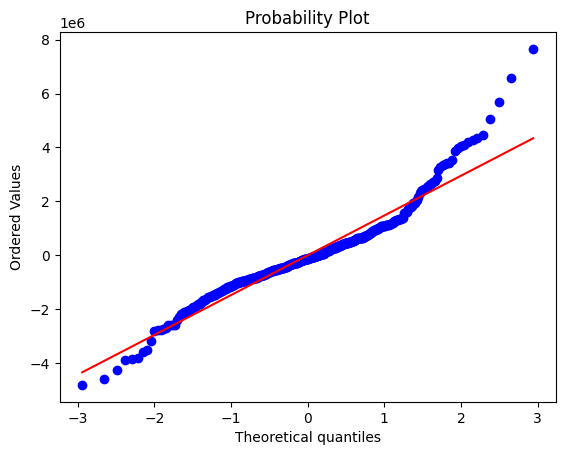

In [11]:
# QQ plot 그래프 나타내기
import scipy.stats as stats
import pylab
stats.probplot(result.resid, dist="norm", plot=pylab)
pylab.show()

C:\Users\hwnam\AppData\Local\Temp\ipykernel_7076\2897543671.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result.resid)


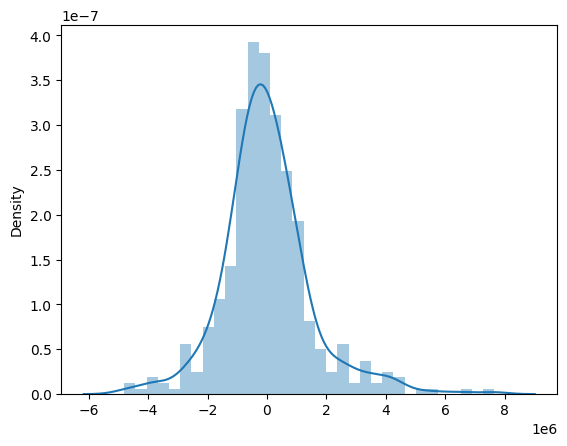

In [16]:
# 잔차의 히스토그램
sns.distplot(result.resid)
plt.show()

In [14]:
# shapiro-wilk 검정
from scipy import stats
from scipy.stats import shapiro
shapiro_test = stats.shapiro(result.resid)
print(shapiro_test)



ShapiroResult(statistic=0.9362091422080994, pvalue=1.6122410481309024e-12)


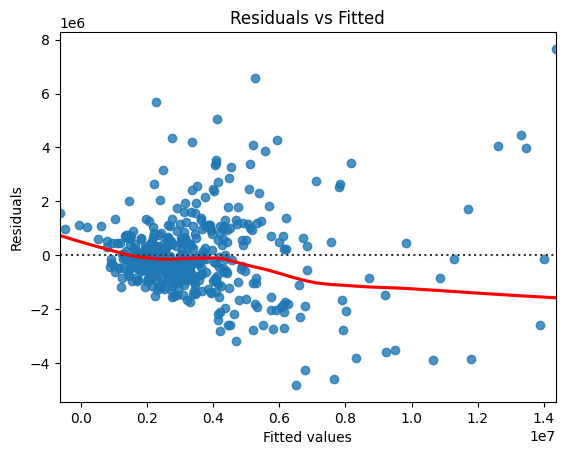

In [15]:
# 등분산성 확인
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(result.resid, result.model.exog)
lzip(name, test)
# residplot 사용해서 그래프 그리기
import seaborn as sns
sns.residplot(x=result.fittedvalues, y=result.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()


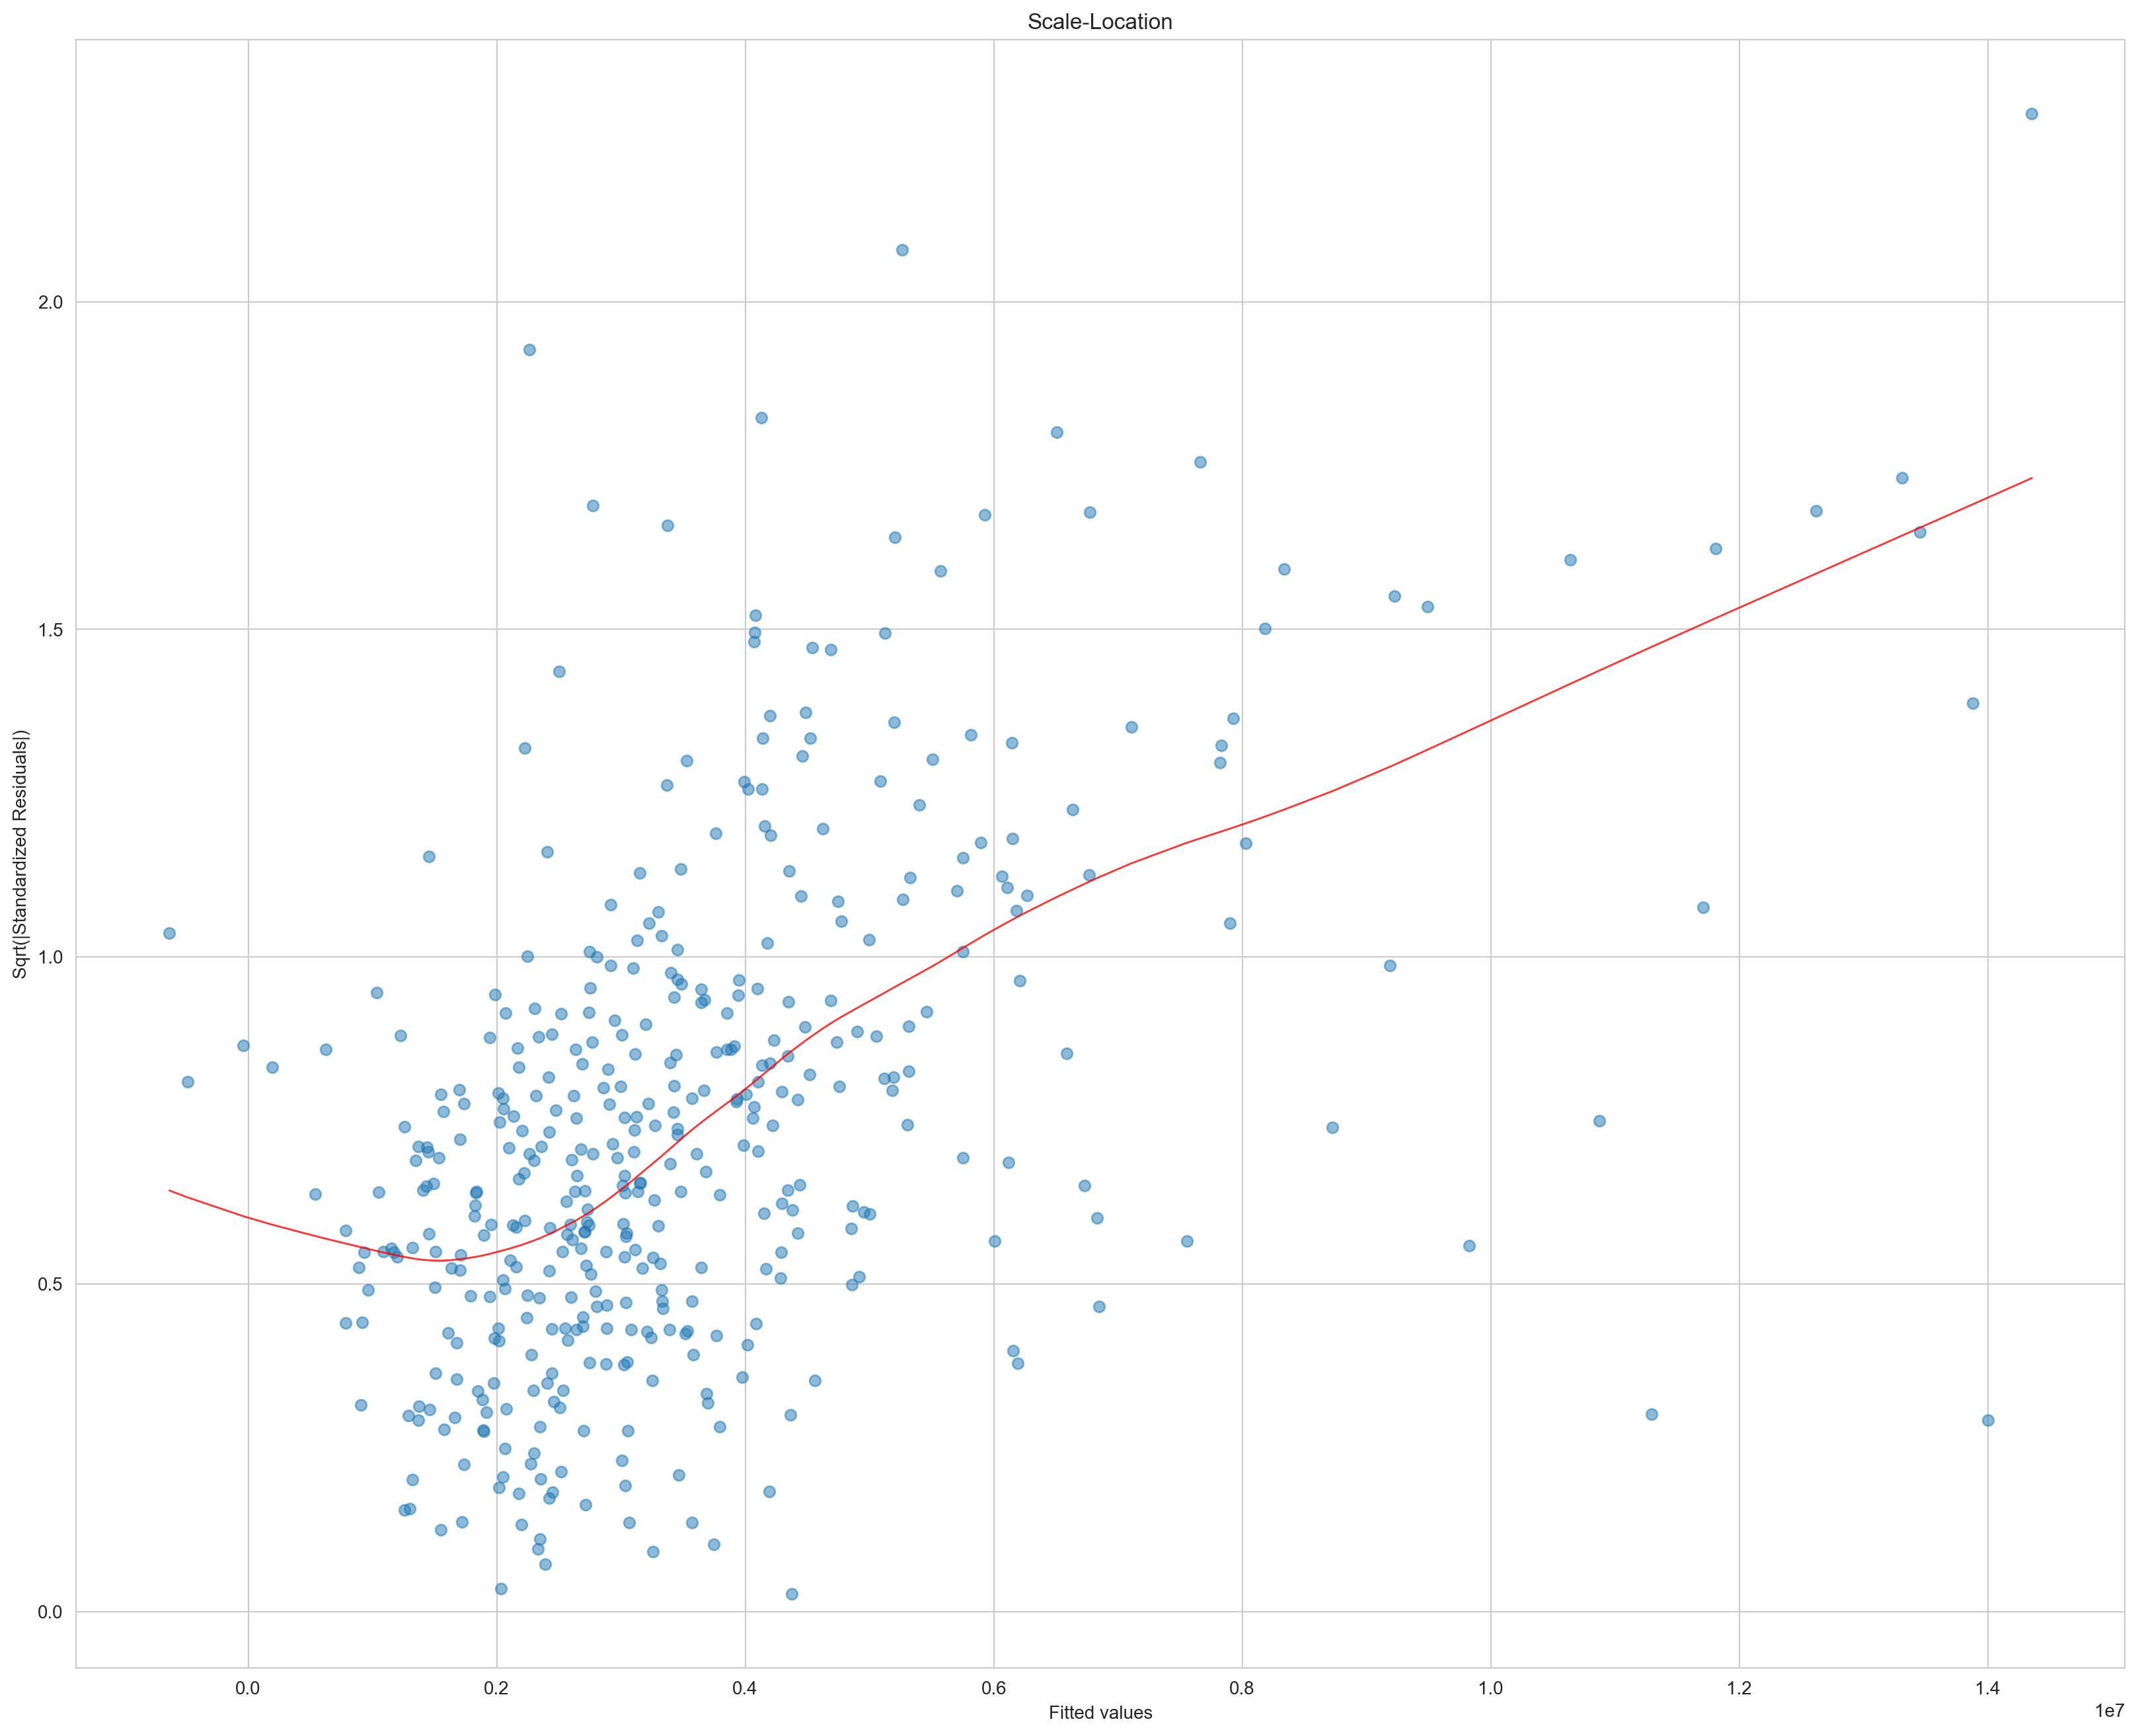

In [221]:
import numpy as np
import matplotlib.pyplot as plt

# 잔차의 표준화된 값에 대한 제곱근 계산
standardized_residuals = result.get_influence().resid_studentized_internal
sqrt_standardized_residuals = np.sqrt(np.abs(standardized_residuals))

# Scale-Location 그래프 그리기
plt.scatter(result.fittedvalues, sqrt_standardized_residuals, alpha=0.5)
sns.regplot(x=result.fittedvalues, y=sqrt_standardized_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plt.xlabel('Fitted values')
plt.ylabel('Sqrt(|Standardized Residuals|)')
plt.title('Scale-Location')
plt.show()


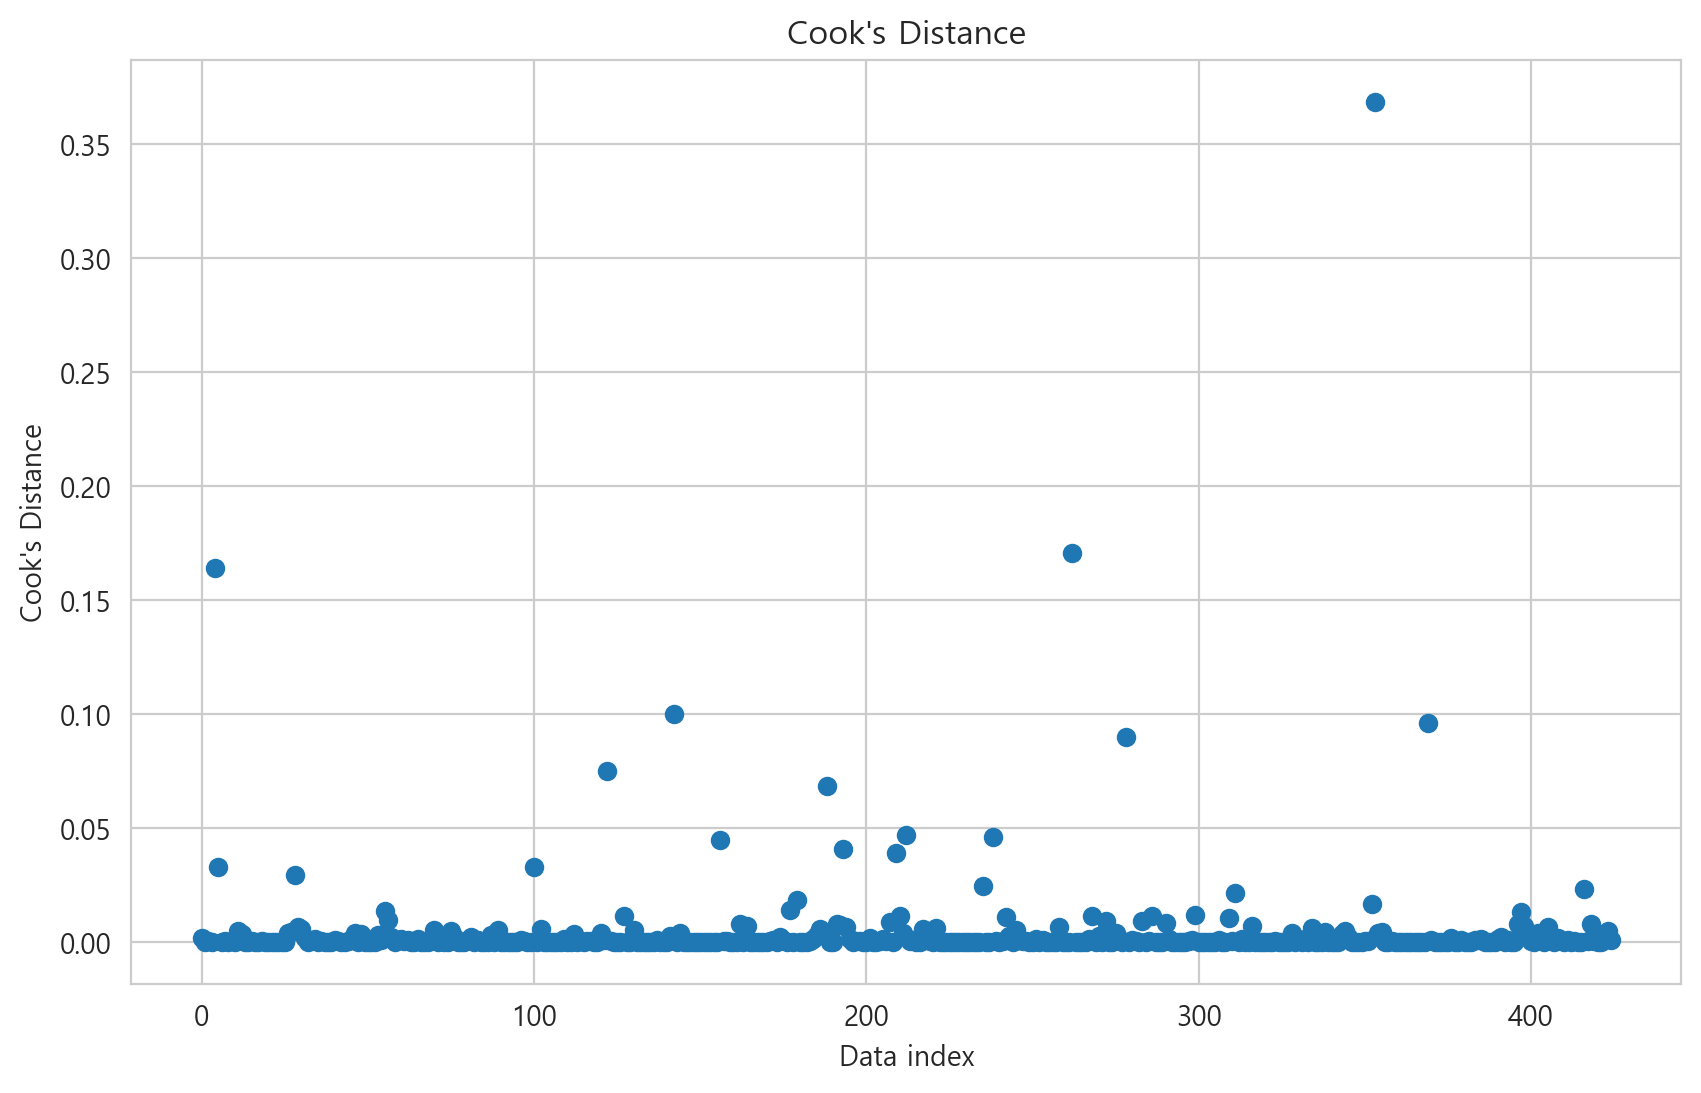

In [262]:
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(cooks_distance)), cooks_distance)
plt.title("Cook's Distance")
plt.xlabel("Data index")
plt.ylabel("Cook's Distance")
plt.show()

In [171]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

In [172]:
# 표준화
sc = StandardScaler()  # StandardScaler 객체 생성
X_train_std = sc.fit_transform(X_train)  # X_train 데이터를 표준화하여 변환
X_test_std = sc.transform(X_test)  # X_test 데이터를 표준화하여 변환

# 표준화된 데이터를 DataFrame으로 변환하고, 원래의 열 이름을 사용
X_train_std_df = pd.DataFrame(X_train_std, columns=X_train.columns)
X_test_std_df = pd.DataFrame(X_test_std, columns=X_test.columns)

<Axes: >

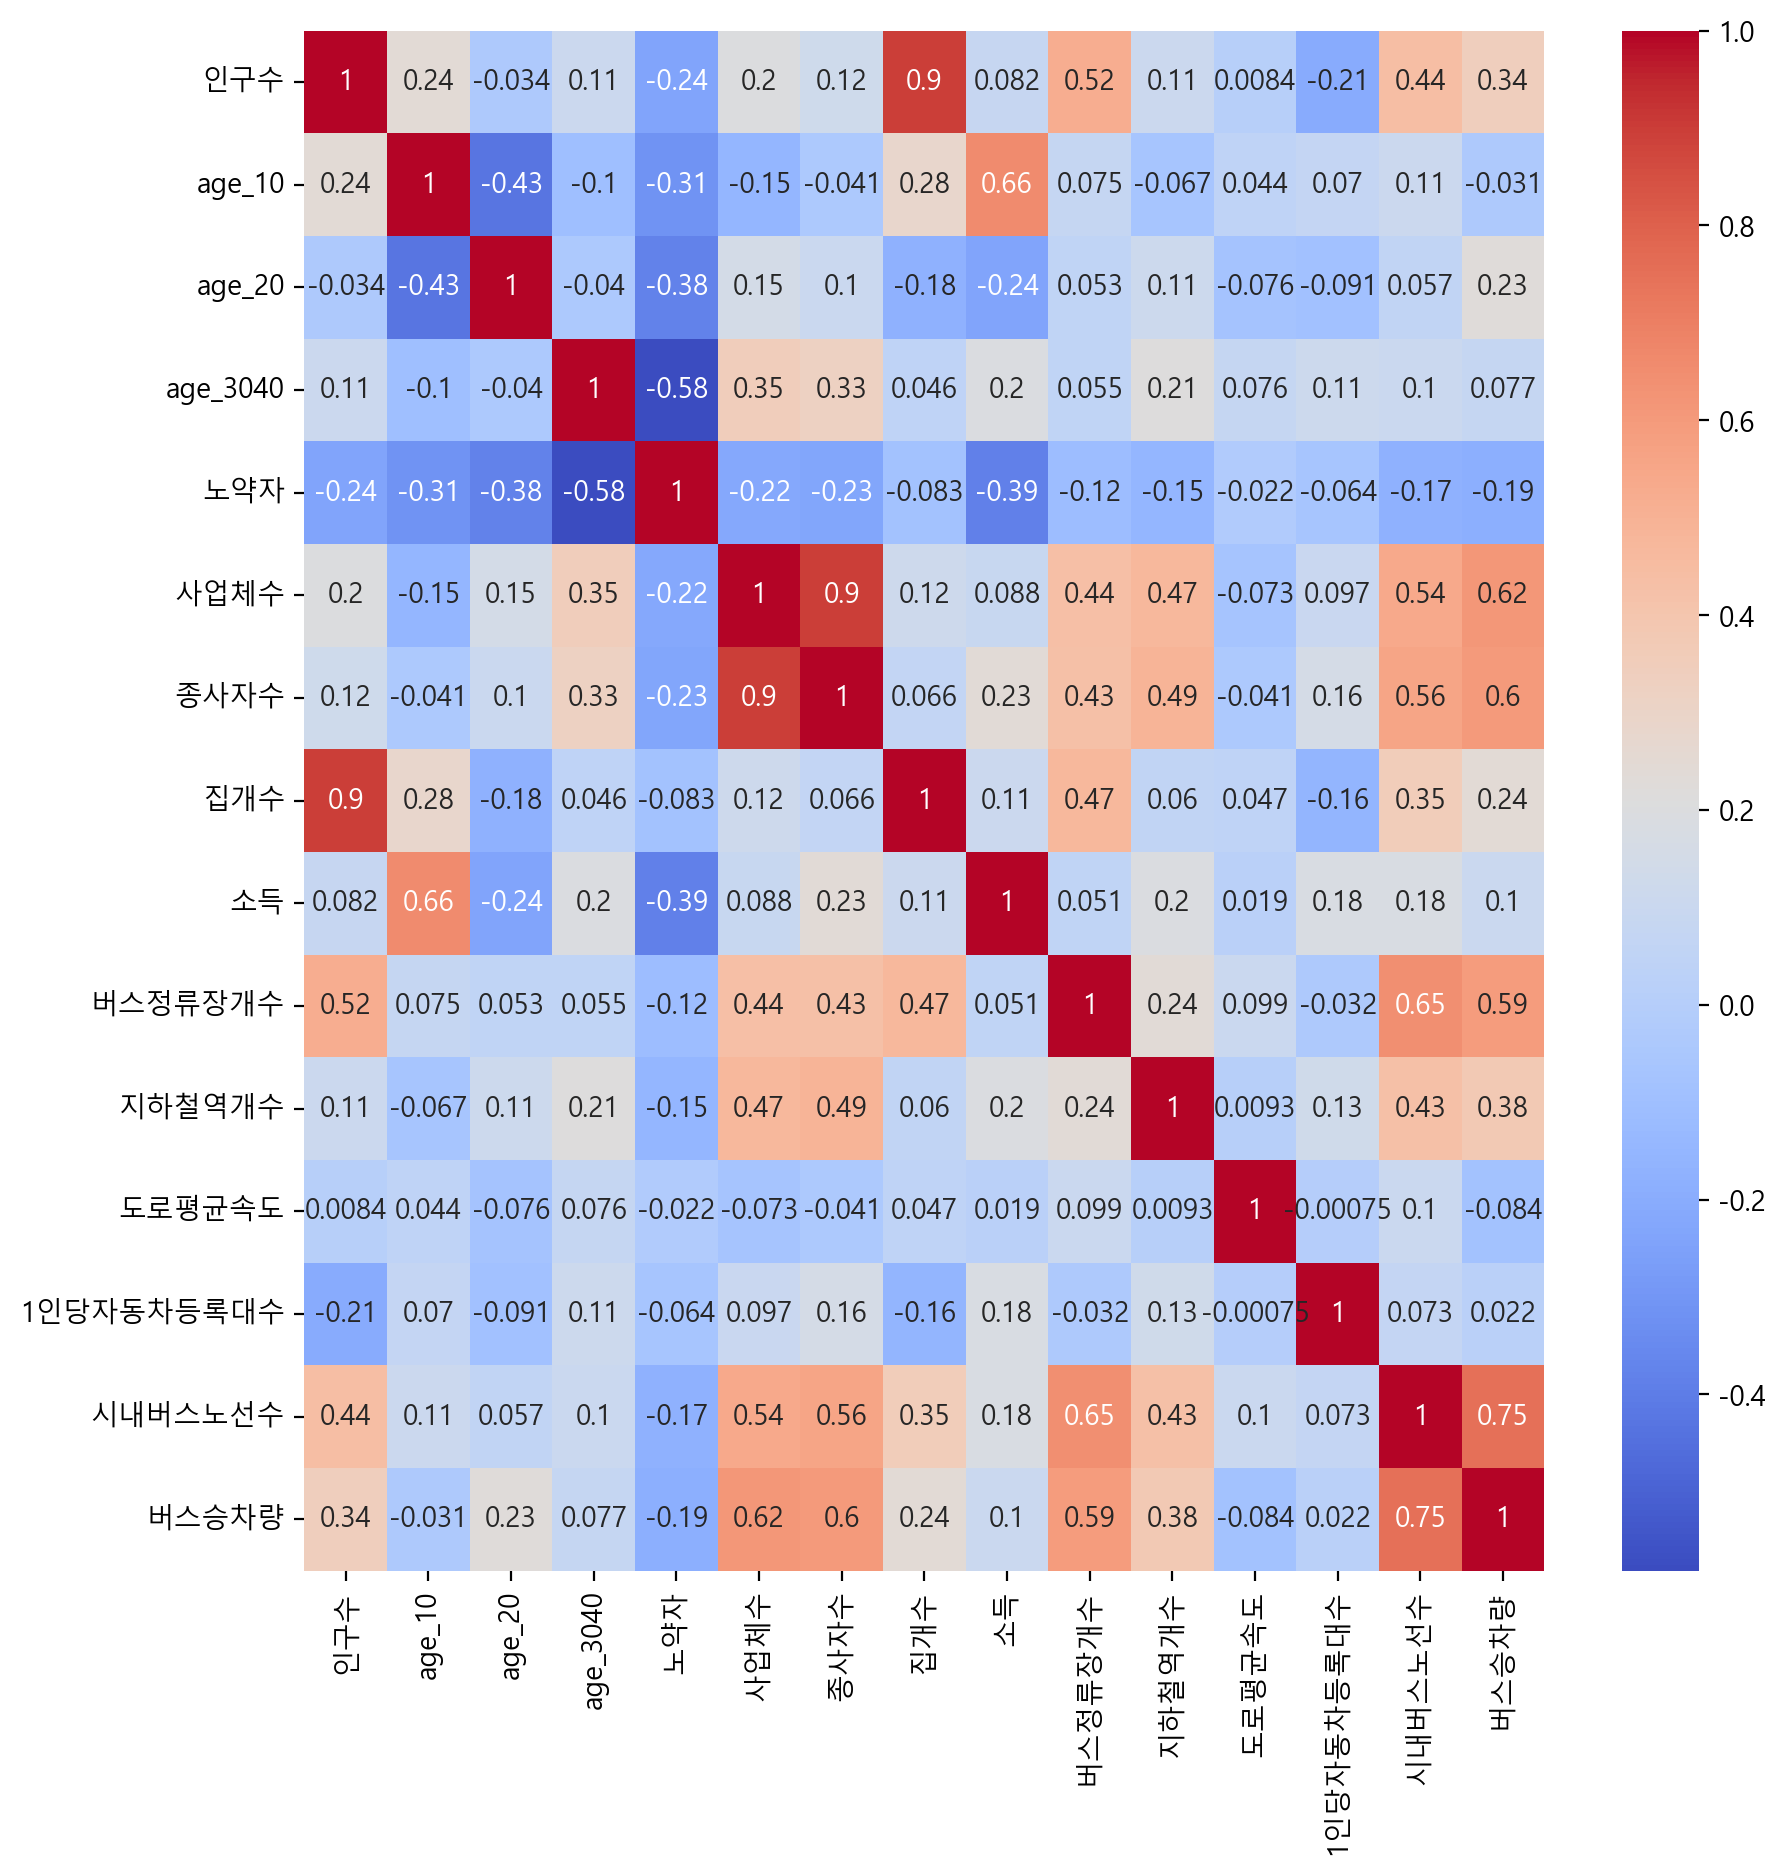

In [203]:
# 표준화 상관 관계 분석
plt.figure(figsize=(10, 10))
X_std = StandardScaler().fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns)
X_std['버스승차량'] = data_df['버스승차량']
corr = X_std.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [174]:
#선형회귀모델 가정 확인하기
X_train_std = sm.add_constant(X_train_std)
model = sm.OLS(y_train, X_train_std)
model_trained = model.fit()

In [153]:
#표준화한 값 vif 수치 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_std.values, i) for i in range(X_std.shape[1])]
vif["features"] = X_std.columns
vif

,VIF Factor,features
0,7.578605,인구수
1,6.627392,age_10
2,5.177546,age_20
3,5.239430,age_3040
4,8.307235,노약자
5,6.346687,사업체수
6,6.576376,종사자수
7,6.605342,집개수
8,2.439987,소득
9,2.123419,버스정류장개수
